# Sales Data Mining Assignment

This notebook loads the provided sales dataset, performs cleaning and feature enrichment, explores trends, comparisons, distributions, and relationships, and saves charts and aggregates in the `outputs/` folder. Run cells from top to bottom.


In [13]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = Path().resolve()
data_path = base_dir / "data" / "sales_data.csv"
output_dir = base_dir / "outputs"
agg_dir = output_dir / "aggregates"
output_dir.mkdir(parents=True, exist_ok=True)
agg_dir.mkdir(parents=True, exist_ok=True)
sns.set_theme(style="whitegrid")

def savefig(name):
    path = output_dir / f"{name}.png"
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.show()
    return path


In [14]:
df = pd.read_csv(data_path)
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"])
df["Year"] = df["Sale_Date"].dt.year
df["Month"] = df["Sale_Date"].dt.to_period("M").dt.to_timestamp()
df["Week"] = df["Sale_Date"].dt.isocalendar().week.astype(int)
df["Gross_Margin"] = (df["Unit_Price"] - df["Unit_Cost"]) * df["Quantity_Sold"]
df["Net_Revenue"] = df["Sales_Amount"] * (1 - df["Discount"])
df["Net_Profit"] = df["Gross_Margin"] - (df["Sales_Amount"] - df["Net_Revenue"])
df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Week,Gross_Margin,Net_Revenue,Net_Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023,2023-02-01,5,2060.46,4599.1127,1605.6027
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023,2023-04-01,16,6681.85,3901.7778,6199.6078
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023,2023-09-01,38,3295.20,3704.9840,2368.9540
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023,2023-08-01,34,5371.08,2124.5812,5327.7212
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023,2023-03-01,12,719.42,3450.1840,419.4040


## Dataset Overview


In [15]:
overview = {
    "rows": len(df),
    "cols": df.shape[1],
    "numeric_cols": df.select_dtypes(include="number").columns.tolist(),
    "categorical_cols": df.select_dtypes(exclude="number").columns.tolist(),
    "missing": df.isna().sum().to_dict()
}
overview


{'rows': 1000,
 'cols': 20,
 'numeric_cols': ['Product_ID',
  'Sales_Amount',
  'Quantity_Sold',
  'Unit_Cost',
  'Unit_Price',
  'Discount',
  'Year',
  'Week',
  'Gross_Margin',
  'Net_Revenue',
  'Net_Profit'],
 'categorical_cols': ['Sale_Date',
  'Sales_Rep',
  'Region',
  'Product_Category',
  'Customer_Type',
  'Payment_Method',
  'Sales_Channel',
  'Region_and_Sales_Rep',
  'Month'],
 'missing': {'Product_ID': 0,
  'Sale_Date': 0,
  'Sales_Rep': 0,
  'Region': 0,
  'Sales_Amount': 0,
  'Quantity_Sold': 0,
  'Product_Category': 0,
  'Unit_Cost': 0,
  'Unit_Price': 0,
  'Customer_Type': 0,
  'Discount': 0,
  'Payment_Method': 0,
  'Sales_Channel': 0,
  'Region_and_Sales_Rep': 0,
  'Year': 0,
  'Month': 0,
  'Week': 0,
  'Gross_Margin': 0,
  'Net_Revenue': 0,
  'Net_Profit': 0}}

In [16]:
df.describe(include="all")


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year,Month,Week,Gross_Margin,Net_Revenue,Net_Profit
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.00000,1000,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,5,4,NaN,NaN,4,NaN,NaN,2,NaN,3,2,20,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,David,North,NaN,NaN,Clothing,NaN,NaN,New,NaN,Credit Card,Retail,North-Eve,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,222,267,NaN,NaN,268,NaN,NaN,504,NaN,345,512,64,NaN,NaN,NaN,NaN,NaN,NaN
mean,1050.128000,2023-07-02 17:42:43.199999744,NaN,NaN,5019.265230,25.355000,NaN,2475.304550,2728.440120,NaN,0.15239,NaN,NaN,NaN,2023.003000,2023-06-17 19:17:45.600000,26.528000,6487.847070,4248.637738,5717.219578
min,1001.000000,2023-01-01 00:00:00,NaN,NaN,100.120000,1.000000,NaN,60.280000,167.120000,NaN,0.00000,NaN,NaN,NaN,2023.000000,2023-01-01 00:00:00,1.000000,17.360000,84.100800,-2665.725000
25%,1024.000000,2023-03-30 00:00:00,NaN,NaN,2550.297500,13.000000,NaN,1238.380000,1509.085000,NaN,0.08000,NaN,NaN,NaN,2023.000000,2023-03-01 00:00:00,13.000000,1892.302500,2108.013875,1226.195450
50%,1051.000000,2023-06-30 12:00:00,NaN,NaN,5019.300000,25.000000,NaN,2467.235000,2696.400000,NaN,0.15000,NaN,NaN,NaN,2023.000000,2023-06-16 00:00:00,26.000000,5236.825000,4227.239700,4319.159700
75%,1075.000000,2023-10-12 00:00:00,NaN,NaN,7507.445000,38.000000,NaN,3702.865000,3957.970000,NaN,0.23000,NaN,NaN,NaN,2023.000000,2023-10-01 00:00:00,41.000000,9935.082500,6296.269675,9082.758650
max,1100.000000,2024-01-01 00:00:00,NaN,NaN,9989.040000,49.000000,NaN,4995.300000,5442.150000,NaN,0.30000,NaN,NaN,NaN,2024.000000,2024-01-01 00:00:00,52.000000,23441.110000,9715.867000,23256.897300


## Trend Analysis


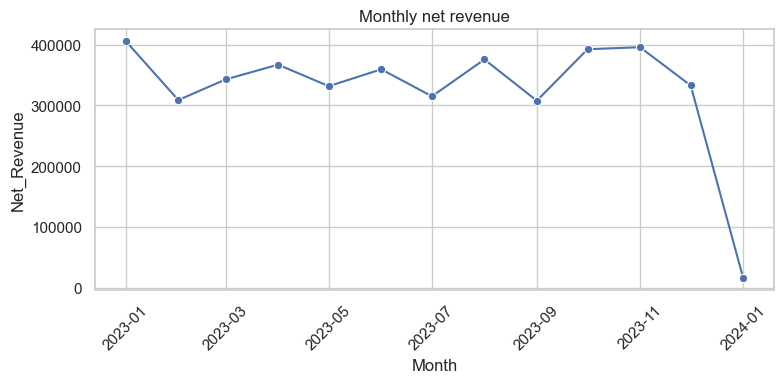

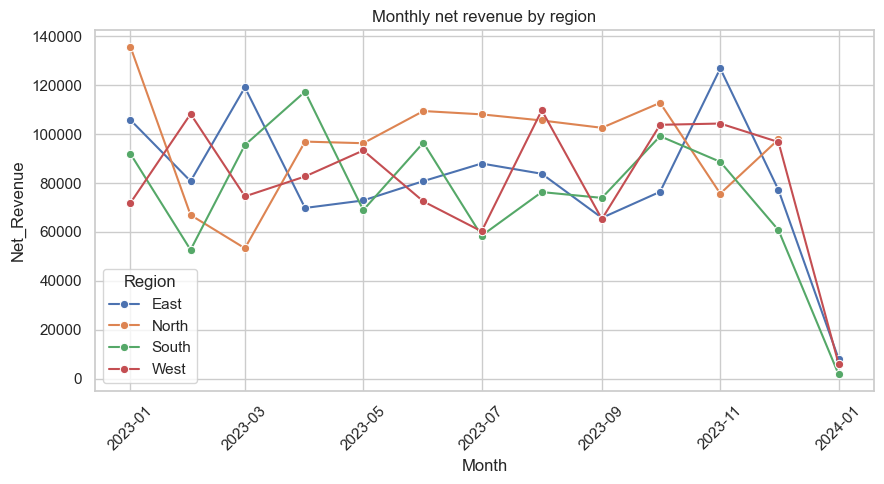

(WindowsPath('E:/Projects/hw3-dm/outputs/trend_monthly_revenue.png'),
 WindowsPath('E:/Projects/hw3-dm/outputs/trend_monthly_revenue_by_region.png'))

In [17]:
monthly = df.groupby("Month")["Net_Revenue"].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly, x="Month", y="Net_Revenue", marker="o")
plt.title("Monthly net revenue")
plt.xticks(rotation=45)
path_monthly = savefig("trend_monthly_revenue")
monthly.to_csv(agg_dir / "monthly_revenue.csv", index=False)

monthly_region = df.groupby(["Month", "Region"])["Net_Revenue"].sum().reset_index()
plt.figure(figsize=(9,5))
sns.lineplot(data=monthly_region, x="Month", y="Net_Revenue", hue="Region", marker="o")
plt.title("Monthly net revenue by region")
plt.xticks(rotation=45)
path_monthly_region = savefig("trend_monthly_revenue_by_region")
monthly_region.to_csv(agg_dir / "monthly_revenue_by_region.csv", index=False)

path_monthly, path_monthly_region


## Comparison Analysis


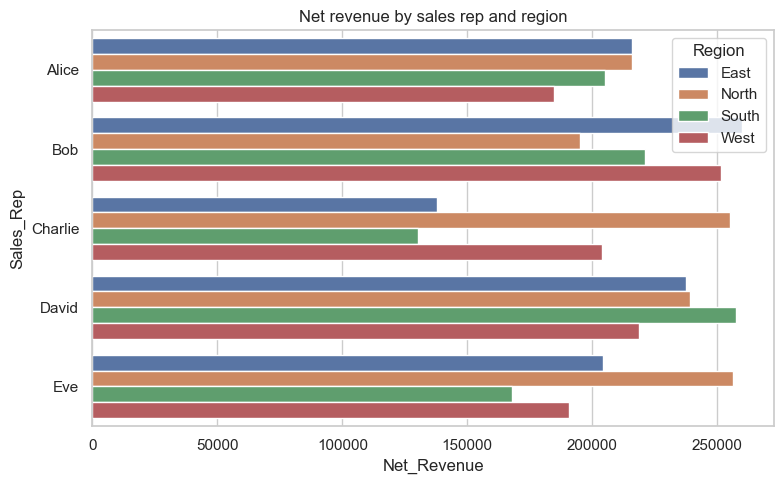

WindowsPath('E:/Projects/hw3-dm/outputs/comparison_rep_region.png')

In [18]:
rep_perf = df.groupby(["Sales_Rep", "Region"])["Net_Revenue"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=rep_perf, x="Net_Revenue", y="Sales_Rep", hue="Region", estimator=sum, errorbar=None)
plt.title("Net revenue by sales rep and region")
path_rep = savefig("comparison_rep_region")
rep_perf.to_csv(agg_dir / "rep_region_revenue.csv", index=False)
path_rep


## Distribution Analysis


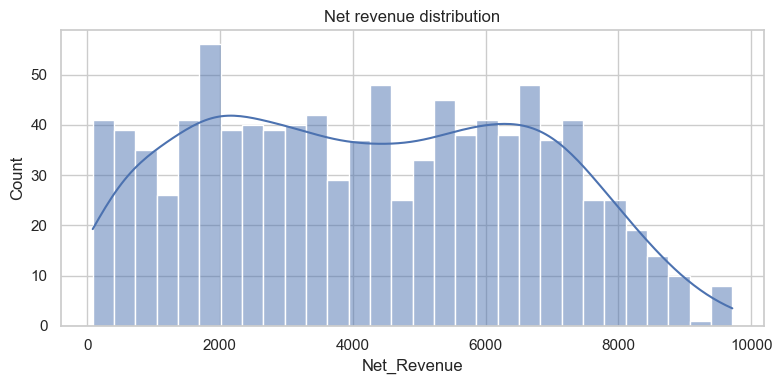

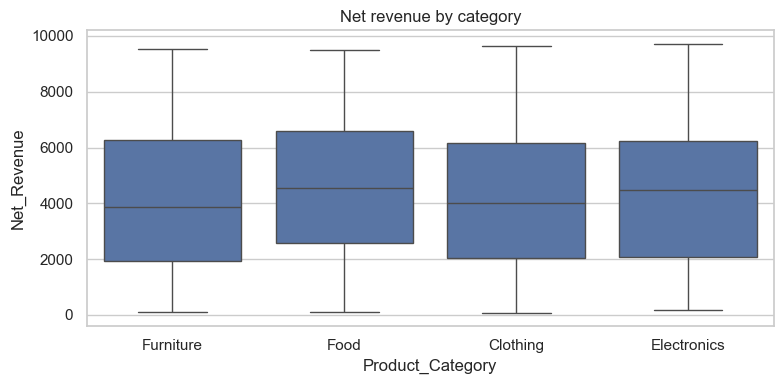

(WindowsPath('E:/Projects/hw3-dm/outputs/distribution_net_revenue.png'),
 WindowsPath('E:/Projects/hw3-dm/outputs/distribution_net_revenue_by_category.png'))

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df["Net_Revenue"], bins=30, kde=True)
plt.title("Net revenue distribution")
path_dist = savefig("distribution_net_revenue")

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Product_Category", y="Net_Revenue")
plt.title("Net revenue by category")
path_box = savefig("distribution_net_revenue_by_category")

path_dist, path_box


## Relationship Analysis


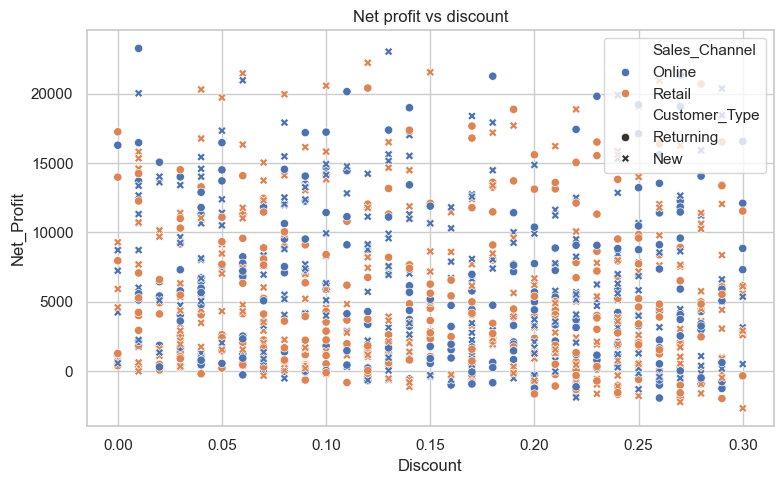

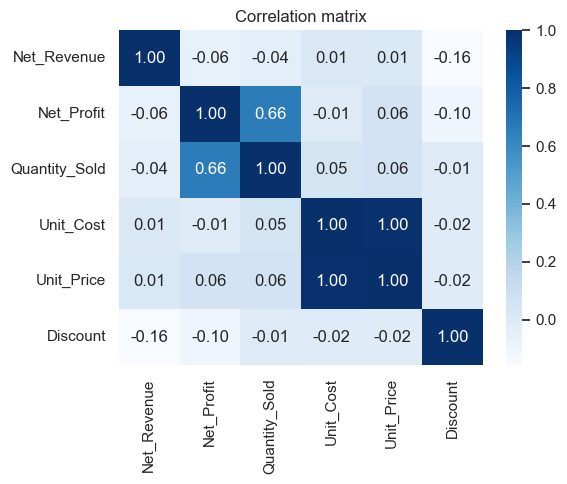

(WindowsPath('E:/Projects/hw3-dm/outputs/relationship_profit_discount.png'),
 WindowsPath('E:/Projects/hw3-dm/outputs/relationship_correlation.png'))

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Discount", y="Net_Profit", hue="Sales_Channel", style="Customer_Type")
plt.title("Net profit vs discount")
path_rel = savefig("relationship_profit_discount")

corr = df[["Net_Revenue", "Net_Profit", "Quantity_Sold", "Unit_Cost", "Unit_Price", "Discount"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation matrix")
path_corr = savefig("relationship_correlation")

path_rel, path_corr


## Insights and Key Figures


In [21]:
top_revenue = df.groupby("Sales_Rep")["Net_Revenue"].sum().sort_values(ascending=False).head(5)
top_category = df.groupby("Product_Category")["Net_Revenue"].sum().sort_values(ascending=False)
channel_share = df.groupby("Sales_Channel")["Net_Revenue"].sum().sort_values(ascending=False)
region_share = df.groupby("Region")["Net_Revenue"].sum().sort_values(ascending=False)
summary = {
    "top_revenue_reps": top_revenue.to_dict(),
    "top_categories": top_category.to_dict(),
    "revenue_by_channel": channel_share.to_dict(),
    "revenue_by_region": region_share.to_dict()
}
pd.DataFrame.from_dict(summary, orient="index").transpose()


,top_revenue_reps,top_categories,revenue_by_channel,revenue_by_region
David,953313.8036,NaN,NaN,NaN
Bob,927382.0179,NaN,NaN,NaN
Alice,821870.7186,NaN,NaN,NaN
Eve,819368.1735,NaN,NaN,NaN
Charlie,726703.0243,NaN,NaN,NaN
Clothing,NaN,1.096397e+06,NaN,NaN
Electronics,NaN,1.077809e+06,NaN,NaN
Furniture,NaN,1.059000e+06,NaN,NaN
Food,NaN,1.015431e+06,NaN,NaN
Retail,NaN,NaN,2.163335e+06,NaN
